In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor # <-- Import XGBoost Regressor
import warnings
warnings.filterwarnings('ignore')

# Load the single complete dataset
df = pd.read_csv('calories (1).csv')

# Preprocessing
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Define features and target variable
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

# Split and Scale
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.1, random_state=22)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Initialize and Train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    random_state=42,
    objective='reg:squarederror', # Standard objective for regression
    n_jobs=-1 # Uses all available processors
)

print("Training XGBoost Regressor...")
xgb_model.fit(X_train, y_train)

# Predict and Evaluate
train_preds_xgb = xgb_model.predict(X_train)
val_preds_xgb = xgb_model.predict(X_val)

print("\nXGBoost Regressor Performance")
print(f"Training Error (MAE): {mean_absolute_error(y_train, train_preds_xgb):.4f}")
print(f"Validation Error (MAE): {mean_absolute_error(y_val, val_preds_xgb):.4f}")

print(f"Training R-squared: {r2_score(y_train, train_preds_xgb):.4f}")
print(f"Validation R-squared: {r2_score(y_val, val_preds_xgb):.4f}")

Training XGBoost Regressor...

XGBoost Regressor Performance
Training Error (MAE): 0.9499
Validation Error (MAE): 1.3647
Training R-squared: 0.9996
Validation R-squared: 0.9990


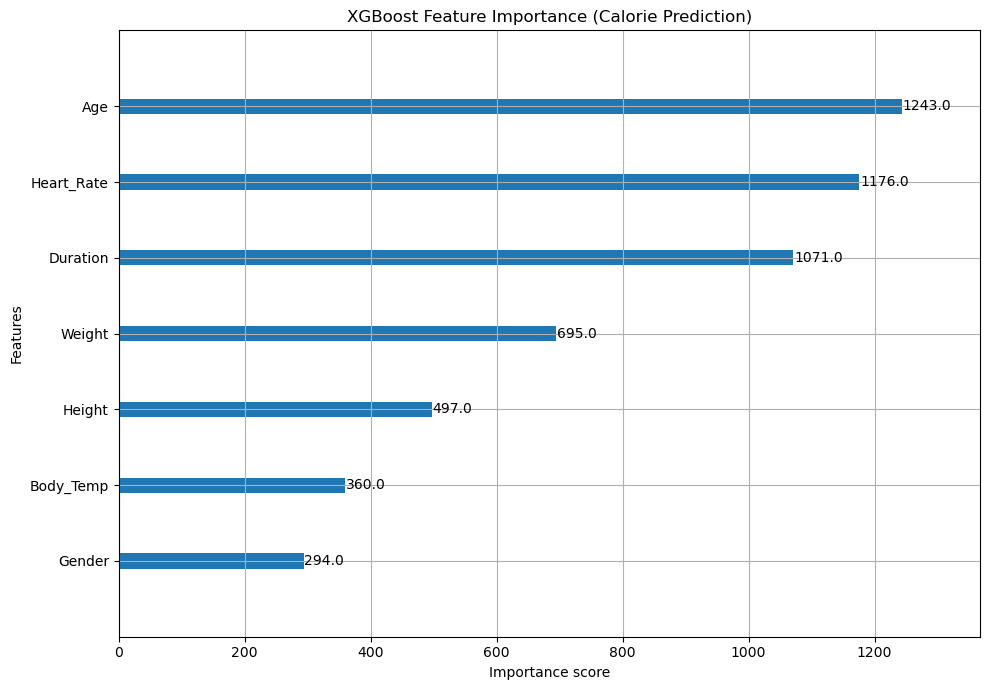

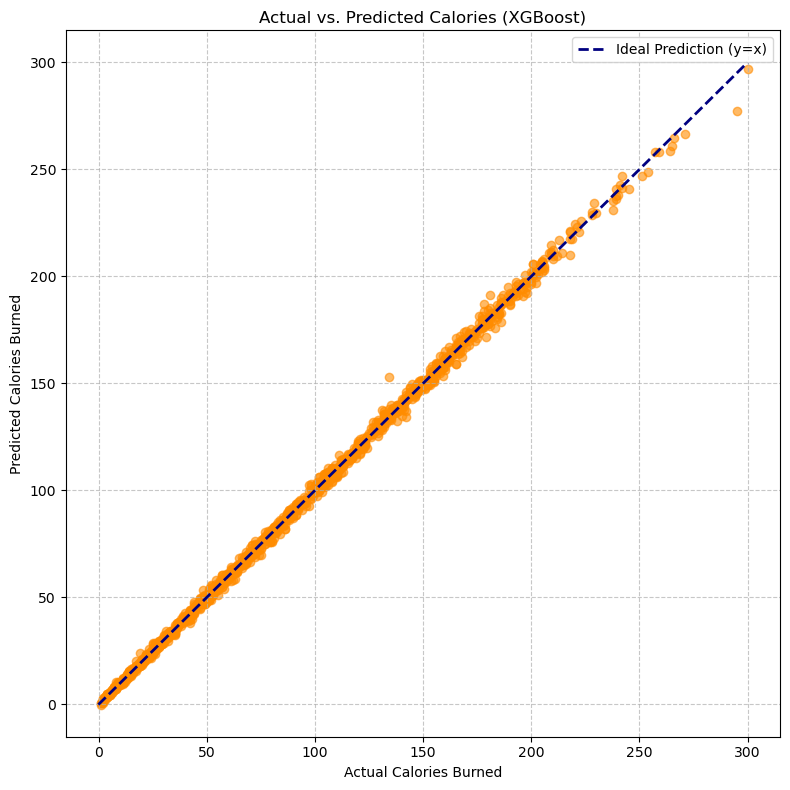

XGBoost graphical representation files created: xgb_feature_importance.png and xgb_actual_vs_predicted.png


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor, plot_importance # <-- Import plot_importance
import warnings
warnings.filterwarnings('ignore')

# --- 1. Data Preparation (Rerun from previous steps) ---
df = pd.read_csv('calories (1).csv')
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.1, random_state=22)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Use scaled data for training
X_val_scaled = scaler.transform(X_val)

# Convert feature names to strings for XGBoost plotting compatibility
feature_names = [str(col) for col in features.columns]

# --- 2. Train XGBoost Regressor ---
xgb_model = XGBRegressor(
    n_estimators=100,
    random_state=42,
    objective='reg:squarederror',
    n_jobs=-1
)
# Train on the scaled data
xgb_model.fit(X_train_scaled, y_train) 
val_preds_xgb = xgb_model.predict(X_val_scaled)

# --- 3. Graphical Representations ---

## A. XGBoost Feature Importance Plot

# To make the plot show feature names, we need to set the feature_names attribute
xgb_model.get_booster().feature_names = feature_names

plt.figure(figsize=(10, 7))
plot_importance(xgb_model, ax=plt.gca(), importance_type='weight', title='XGBoost Feature Importance (Calorie Prediction)')
plt.tight_layout()
plt.savefig('xgb_feature_importance.png')
plt.show() # In Jupyter, you might not need plt.show(), but keep it if the image doesn't display.
plt.close()


## B. Actual vs. Predicted Scatter Plot

plt.figure(figsize=(8, 8))
plt.scatter(y_val, val_preds_xgb, alpha=0.6, color='darkorange')

# Add the ideal prediction line (y=x)
max_val = max(max(y_val), max(val_preds_xgb))
min_val = min(min(y_val), min(val_preds_xgb))
plt.plot([min_val, max_val], [min_val, max_val], color='navy', linestyle='--', linewidth=2, label='Ideal Prediction (y=x)')

plt.title('Actual vs. Predicted Calories (XGBoost)')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('xgb_actual_vs_predicted.png')
plt.show()
plt.close()

print("XGBoost graphical representation files created: xgb_feature_importance.png and xgb_actual_vs_predicted.png")